In [3]:
import skfmm
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

In [4]:
vergrad = 0.5  # Vertical gradient
horgrad = 0.  # Horizontal gradient

zmin = 0.; zmax = 6.; deltaz = 0.05
xmin = 0.; xmax = 6.; deltax = 0.05

In [5]:
z = np.arange(zmin, zmax + deltaz, deltaz)
nz = z.size

x = np.arange(xmin, xmax + deltax, deltax)
nx = x.size

Z, X = np.meshgrid(z, x, indexing='ij')

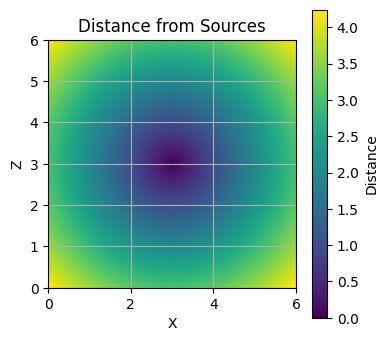

In [6]:
# Create signed distance function 
phi = np.ones((nz, nx))

# Iterate through phi array and calculate distances
for i in range(nz):
  for j in range(nx):
    distance = np.sqrt((z[i] - z[60])**2 + (x[j] - x[60])**2)
    phi[j, i] = distance

# # Iterate through phi array and calculate Manhattan distances
# for i in range(nz):
#   for j in range(nx):
#     distance = np.abs(i - 50) + np.abs(j - 50)
#     phi[j, i] = distance

plt.figure(figsize=(4, 4))
plt.imshow(phi, cmap='viridis', extent=[xmin, xmax, zmin, zmax])
plt.colorbar(label='Distance')
plt.title('Distance from Sources')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True)
plt.show()

# Velocity

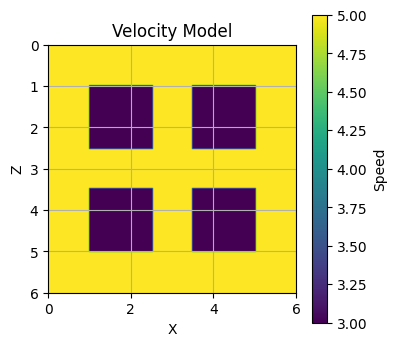

In [7]:
# Define velocity model with two layers
speed = np.ones((nz, nx)) * 5 # Initialize velocity model array

# Define square box location and size
box_half_width = 0.75

# Set velocity within the squares
for i in range(2):
    for j in range(2):
        box_center_z = 1.75 + i * 2.5  # Adjust the box centers along z-axis
        box_center_x = 1.75 + j * 2.5  # Adjust the box centers along x-axis
        
        # Set velocity within the square box
        box_mask = np.logical_and.reduce((Z >= box_center_z - box_half_width,
                                           Z <= box_center_z + box_half_width,
                                           X >= box_center_x - box_half_width,
                                           X <= box_center_x + box_half_width))
        speed[box_mask] = 3  # Velocity inside the square box

plt.figure(figsize=(4, 4))
plt.imshow(speed, cmap='viridis', extent=[xmin, xmax, zmax, zmin])
plt.colorbar(label='Speed')
plt.title('Velocity Model')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True)
plt.show()

In [8]:
t    = skfmm.travel_time(phi, speed, dx=0.0001)

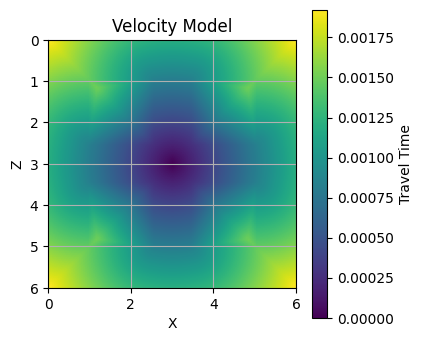

In [9]:
plt.figure(figsize=(4, 4))
plt.imshow(t, cmap='viridis', extent=[xmin, xmax, zmax, zmin])
plt.colorbar(label='Travel Time')
plt.title('Velocity Model')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True)
plt.show()

In [11]:
np.save('../experiences/fsm_output/ckb4.npy', t)